docker run -p 8888:8888 my-midas-project


In [3]:
# %matplotlib inline
# 1.5.3 pandas
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from midas.mix import mix_freq, mix_freq2
from midas.adl import estimate, forecast, midas_adl, rmse, estimate2,forecast2, midas_adl2
print(pd.__version__)


1.5.3


In [2]:
shoppee = pd.read_csv('./testData/hitachi_test_data.csv')
google_trend = pd.read_csv('./testData/google_trend_ตู้เย็น hitachi.csv')

FileNotFoundError: [Errno 2] No such file or directory: './testData/hitachi_test_data.csv'

In [17]:
google_trend = google_trend[1:]

In [18]:
shoppee

,Unnamed: 0,Revenue,Quantity
0,1/1/2025,173519,28
1,1/2/2025,83827,15
2,1/3/2025,101322,19
3,1/4/2025,101536,21
4,1/5/2025,92396,15
...,...,...,...
163,6/13/2025,130232,26
164,6/14/2025,240899,32
165,6/15/2025,775840,123
166,6/16/2025,227456,46


In [19]:

# Convert shoppee date column to datetime
shoppee['Date'] = pd.to_datetime(shoppee['Unnamed: 0'])

# Reset google_trend index and convert to datetime
google_trend_reset = google_trend.reset_index()
google_trend_reset.rename(columns={'index': 'Date'}, inplace=True)
google_trend_reset['Date'] = pd.to_datetime(google_trend_reset['Date'])

# Merge on 'Date'
merged_df = pd.merge(shoppee, google_trend_reset, on='Date', how='inner')


In [21]:
merged_df = merged_df.drop(columns=['Date'])
merged_df

,Unnamed: 0,Revenue,Quantity,Category: All categories
0,1/1/2025,173519,28,0
1,1/2/2025,83827,15,0
2,1/3/2025,101322,19,0
3,1/4/2025,101536,21,0
4,1/5/2025,92396,15,0
...,...,...,...,...
163,6/13/2025,130232,26,36
164,6/14/2025,240899,32,51
165,6/15/2025,775840,123,44
166,6/16/2025,227456,46,36


In [23]:
merged_df['Category: All categories'] = merged_df['Category: All categories'].astype(int)

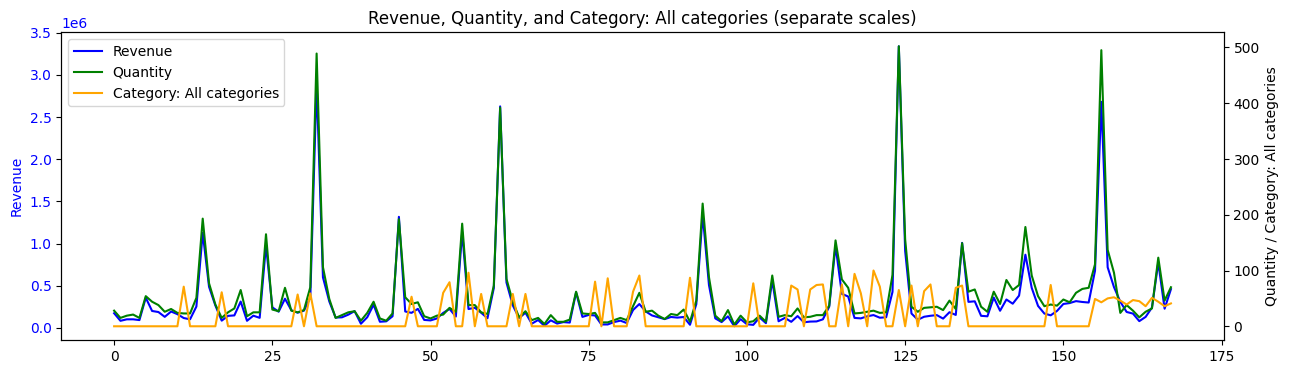

In [30]:
plt.figure(figsize=(15, 4))
ax1 = plt.gca()
ax1.plot(merged_df['Revenue'], label='Revenue', color='blue')
ax1.set_ylabel('Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged_df['Quantity'], label='Quantity', color='green')
ax2.plot(merged_df['Category: All categories'], label='Category: All categories', color='orange')
ax2.set_ylabel('Quantity / Category: All categories', color='black')
ax2.tick_params(axis='y', labelcolor='black')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Revenue, Quantity, and Category: All categories (separate scales)')
plt.show()

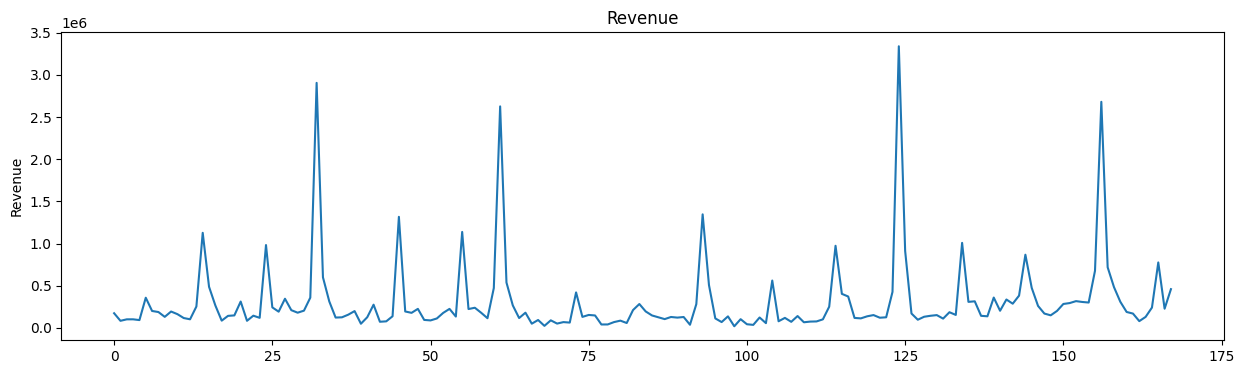

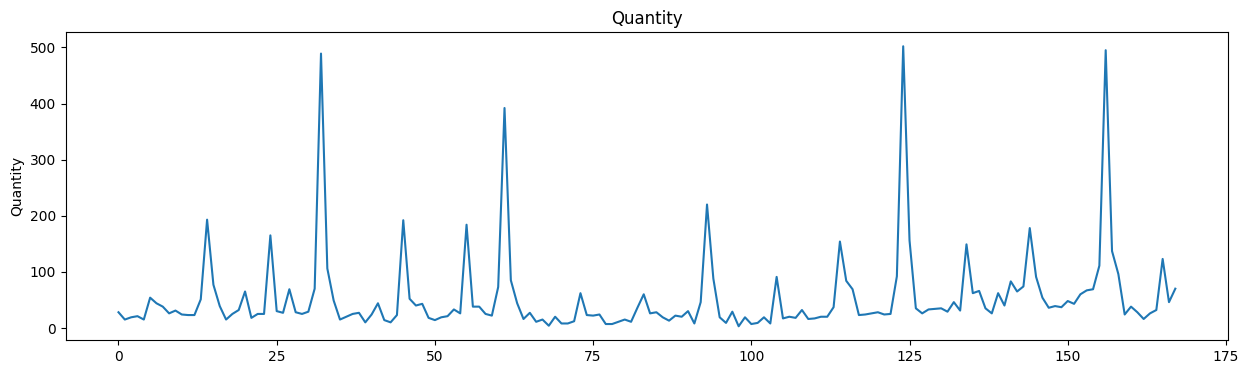

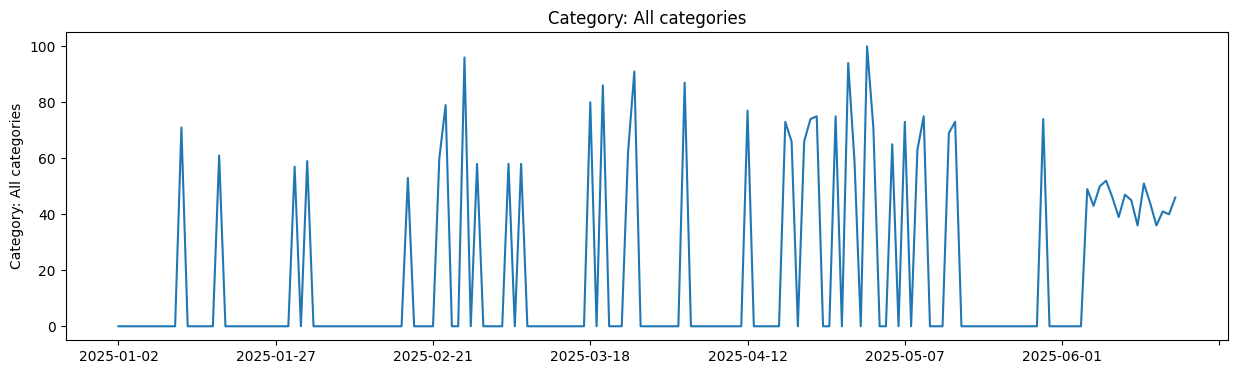

In [25]:
# Plot Revenue
shoppee['Revenue'].plot(figsize=(15, 4), style='-', title='Revenue')
plt.ylabel('Revenue')
plt.show()

# Plot Quantity
shoppee['Quantity'].plot(figsize=(15, 4), style='-', title='Quantity')
plt.ylabel('Quantity')
plt.show()

# Convert the column to numeric before plotting
google_trend_numeric = pd.to_numeric(google_trend['Category: All categories'][1:], errors='coerce')
google_trend_numeric.plot(figsize=(15, 4), style='-', title='Category: All categories')
plt.ylabel('Category: All categories')
plt.show()